## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


<AxesSubplot:>

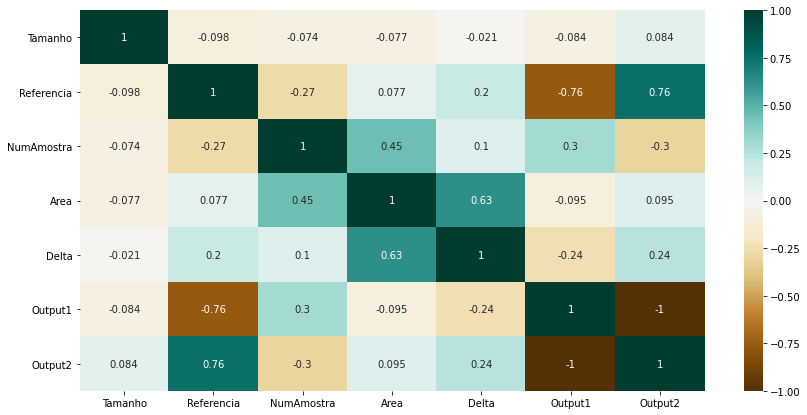

In [4]:
# Mapa de correlação com todas as colunas, para ver quais realmente apagar
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(DataSet.corr(), cmap='BrBG', annot=True, ax=ax)

In [5]:
# Excluindo apenas a hora
DataSet.drop(['Hora'],axis=1,inplace=True)

In [6]:
DataSet.head()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,53,25,69,81,68,1,0
1,53,26,89,87,56,1,0
2,53,27,68,69,55,1,0
3,53,28,36,50,80,1,0
4,53,29,71,72,50,1,0


In [7]:
DataSet.describe()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.126437,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,1.174779,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,53.000000,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,53.000000,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,53.000000,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,53.000000,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [8]:
DataSet.columns

Index(['Tamanho', 'Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1',
       'Output2'],
      dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

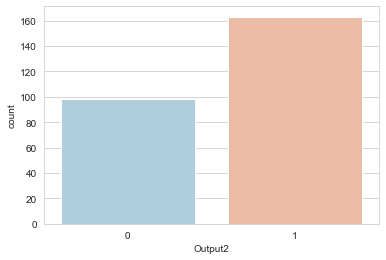

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/home/victor-baesso/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


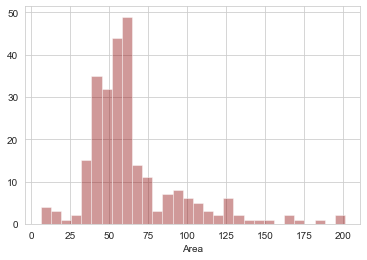

In [10]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

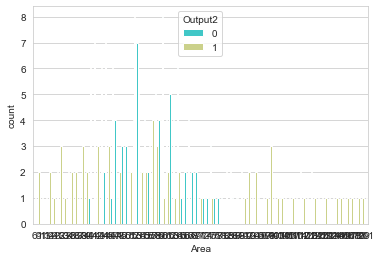

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

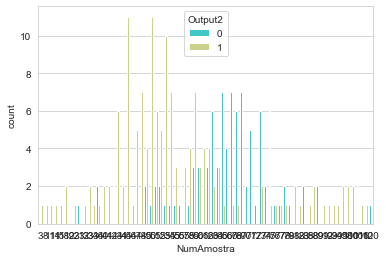

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

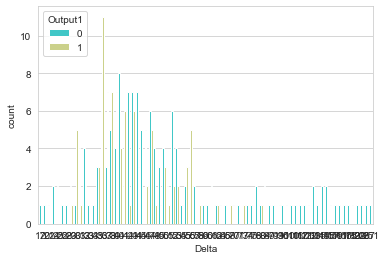

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [14]:
X = DataSet[[ 'NumAmostra', 'Area', 'Delta', 'Referencia', 'Tamanho']]
y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

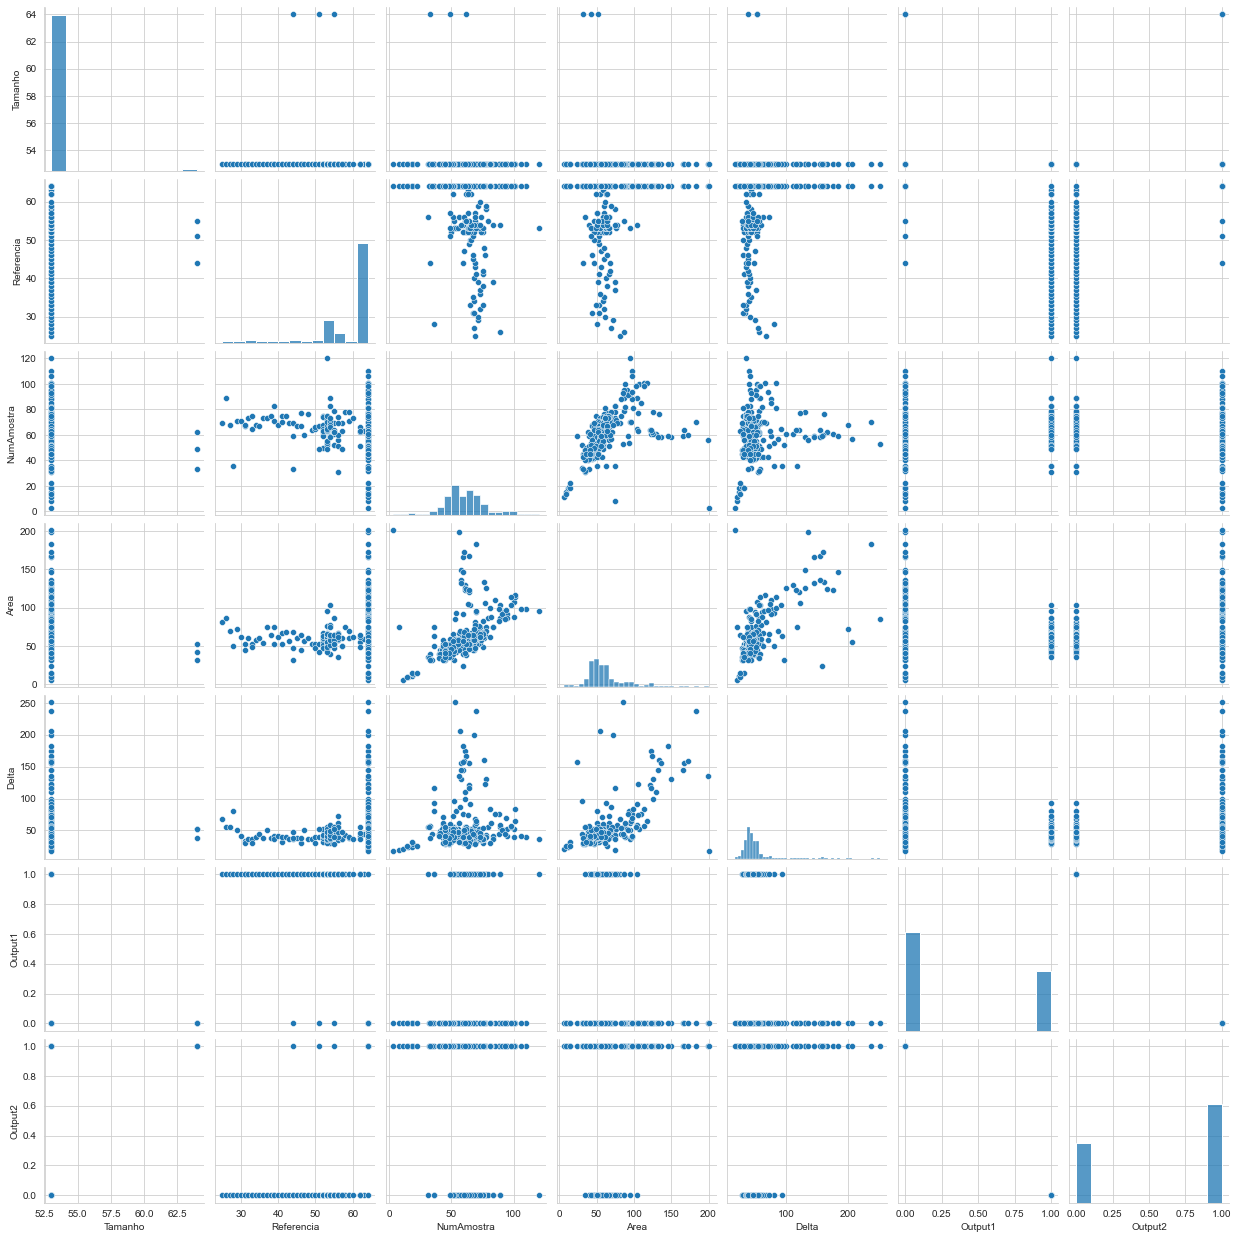

In [15]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

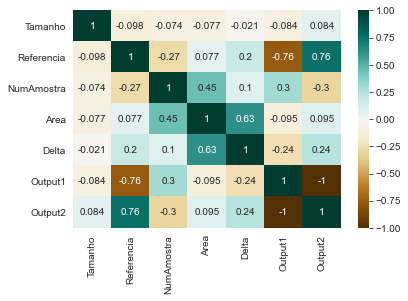

In [16]:
sns.heatmap(DataSet.corr(), annot=True, cmap='BrBG')
plt.show()

## Normalização dos Dados

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['Referencia', 'Tamanho', 'NumAmostra', 'Area', 'Delta', 'Output1','Output2'])

In [18]:
DataSetScaled.head()

,Referencia,Tamanho,NumAmostra,Area,Delta,Output1,Output2
0,-0.107833,-3.627690,0.534314,0.565990,0.373528,1.289676,-1.289676
1,-0.107833,-3.518784,1.693069,0.762257,0.035312,1.289676,-1.289676
2,-0.107833,-3.409879,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-0.107833,-3.300973,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,-0.107833,-3.192067,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [19]:
X = DataSetScaled.drop(['Output1', 'Output2'], axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
200        0        1
54         1        0
66         1        0
229        0        1
181        0        1

[87 rows x 2 columns]
     Referencia   Tamanho  NumAmostra      Area     Delta
89    -0.107833 -0.469422    0.476377 -0.186366 -0.331089
212   -0.107833  0.619637   -0.856191 -1.036855 -0.725675
218   -0.107833  0.619637    1.229567 -0.088232 -0.669306
96    -0.107833 -0.251610   -1.667319 -0.938722  0.007127
88    -0.107833 -0.469422   -0.103000 -0.415344 -0.472013
..          ...       ...         ...       ...       ...
200   -0.107833  0.619637   -0.160938 -0.284499  4.263016
54    -0.107833 -0.360516    0.070813  0.009901  0.035312
66    -0.107833 -0.687233    0.881941  0.108034 -0.472013
229   -0.107833  0.619637    0.766065  0.042612 -0.246535
181   -0.107833  0.619637    0.012875 -0.022810 -0.246535

[87 rows x 5 col

## Criando o Modelo de MPL

In [21]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = n_features
N_hidden = 9
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [22]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.11215461  0.03459218  0.03592977 -0.21763825 -0.18710602 -0.21320653
  -0.00268093  0.12695884 -0.10884456]
 [-0.11842393  0.01239775  0.04995623  0.02355283  0.02998777 -0.03242893
   0.00162963 -0.09482185 -0.098911  ]
 [ 0.17735542  0.0251175  -0.02266735 -0.1655471   0.02586964  0.43879619
   0.010057   -0.04277342  0.06266329]
 [-0.00193775 -0.16143402  0.0566561   0.08774027 -0.0324737   0.11531303
   0.04121794 -0.08427698 -0.07828126]
 [-0.09353815 -0.03234118  0.08101698  0.14313478  0.08370906  0.28571305
  -0.07057303  0.06328633  0.00508377]]
Pesos da Camada de Saída:
[[ 2.32768910e-02  2.19950572e-05]
 [-6.99561971e-02  1.32070869e-01]
 [ 4.74995165e-02  2.54497488e-02]
 [-9.96162766e-02 -1.30074899e-01]
 [-1.02911326e-02  1.08103242e-01]
 [-1.73253288e-02 -1.31681849e-01]
 [ 1.67901906e-01 -6.98646699e-03]
 [ 1.49146473e-02  2.46390395e-02]
 [ 8.65837961e-02 -2.30024869e-02]]


## Algoritmo Backpropagation

In [23]:
epochs = 2000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.24121779017190087
Erro quadrático no treinamento:  0.34823391530726955  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.36319593683436524  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.34623085863494985
Erro quadrático no treinamento:  0.3105045906542453
Erro quadrático no treinamento:  0.2593967798599196
Erro quadrático no treinamento:  0.19807894084449762
Erro quadrático no treinamento:  0.13697382745284048
Erro quadrático no treinamento:  0.08727347327656965
Erro quadrático no treinamento:  0.05322306263732342
Erro quadrático no treinamento:  0.03220462764325992
Erro quadrático no treinamento:  0.019765920535029284
Erro quadrático no treinamento:  0.012429826988562539
Erro quadrático no treinamento:  0.008035463581469818
Erro quadrático no treinamento:  0.005341698595526247
Erro quadrático no treinamento:  0.003647995140486274
Erro quadrático no treinamento:  0.002555614839661112
Erro quadrático no treinament

In [24]:
### Gráfico da Evolução do Erro

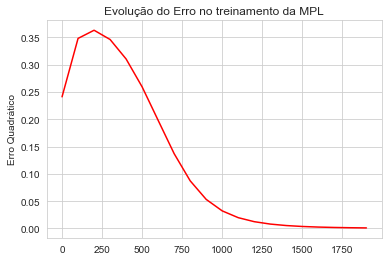

In [25]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [26]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0
all_outputs = []
MSE_Output1=0
MSE_Output2=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        all_outputs.append(output)

        MSE_Output1 += (yi[0] - output[0])**2
        MSE_Output2 += (yi[1] - output[1])**2
#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

MSE_Output1/=n_records 
MSE_Output2/=n_records
print('Erro Quadrático Médio da Saída Output1 é: ', MSE_Output1)
print('Erro Quadrático Médio da Saída Output2 é: ', MSE_Output2)
print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


Erro Quadrático Médio da Saída Output1 é:  0.04587877372754875
Erro Quadrático Médio da Saída Output2 é:  0.046016837344389064
A Acurácia da Predição é de: 0.966


In [27]:
y_pred = []
for i in range(0, len(all_outputs)):
    print(f'Correto {y_test.values[i]} | Predito {round(all_outputs[i][0])} {round(all_outputs[i][1])}')
    y_pred.append([round(all_outputs[i][0]), round(all_outputs[i][1])])

Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [1 0] | Predito 1 0
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [1 0] | Predito 1 0
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [1 0] | Predito 1 0
Correto [0 1] | Predito 0 1
Correto [1 0] | Predito 1 0
Correto [0 1] | Pred

In [28]:
y_pred = np.array(y_pred)
print(y_pred.shape)
print(y_test.shape)

(87, 2)
(87, 2)


[Text(0, 0.5, 'Peça tipo 1'), Text(0, 1.5, 'Peça tipo 2')]

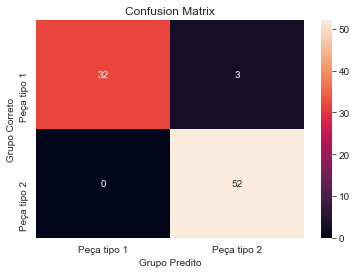

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Grupo Predito')
ax.set_ylabel('Grupo Correto') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Peça tipo 1', 'Peça tipo 2']); ax.yaxis.set_ticklabels(['Peça tipo 1', 'Peça tipo 2'])

In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

f'R2 Score: {r2}'

'R2 Score: 0.8565934065934067'